<a href="https://colab.research.google.com/github/saramony/NorthwesternCourseWork/blob/master/MSDS_422_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#imports pandas
import pandas as pd

#Defines the URL for Github
url= 'https://raw.githubusercontent.com/saramony/NorthwesternCourseWork/master/train.csv'

# Dataset is now stored in a Pandas Dataframe
TrainSet = pd.read_csv(url)

#Defines the shape of the data
print("The dataset has", len(TrainSet), "rows and", TrainSet.shape[1], "columns")

The dataset has 1460 rows and 81 columns


In [4]:
TrainSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Get info on our columns and data size
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The cheapest house sold for 34900 and the most expensive for 755000
The average sales price is 180921.2 while median is 163000.0


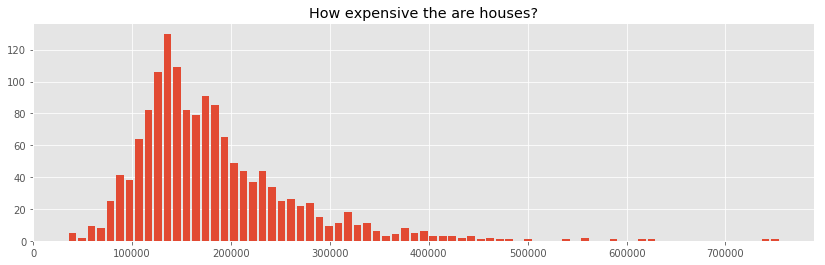

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# How expensive are the houses?
print("The cheapest house sold for", TrainSet.SalePrice.min(), "and the most expensive for", TrainSet.SalePrice.max())
print("The average sales price is", round(TrainSet.SalePrice.mean(), 2),  "while median is",round(TrainSet.SalePrice.median(), 2))
TrainSet.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive the are houses?')
plt.show()

The oldest house was built in 1872 while the newest house was built in 2010


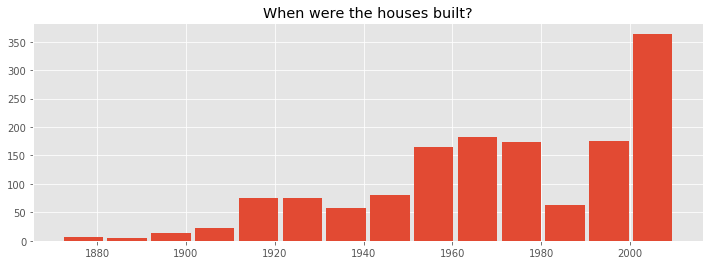

In [7]:
#Looksl like the majority of the houses fall between 50 - 300 (with a strong skew to the left)

# When were the houses built?
print("The oldest house was built in",  TrainSet.YearBuilt.min(), "while the newest house was built in", TrainSet.YearBuilt.max())
      
TrainSet.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

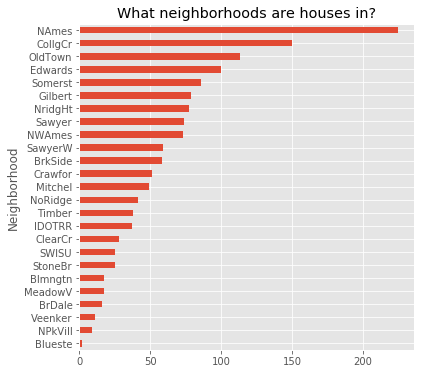

In [8]:
# Where are houses?
TrainSet.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()

The average house has 1515.46 sq ft of space, the median 1464.0 sq ft
The biggest house has 5642 sq ft of space, the smallest has 334


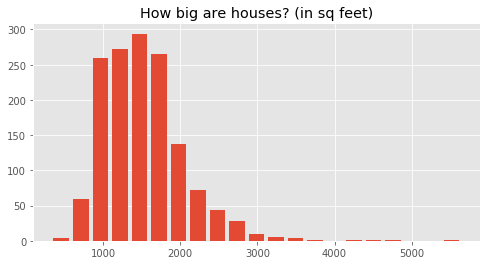

In [9]:
#Looks like the majority of the houses are sold in North Ames

# How big are houses
print("The average house has", round(TrainSet.GrLivArea.mean(), 2), "sq ft of space, the median", round(TrainSet.GrLivArea.median(), 2), "sq ft")
print("The biggest house has", TrainSet.GrLivArea.max(),"sq ft of space, the smallest has", TrainSet.GrLivArea.min())

TrainSet.GrLivArea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.show()

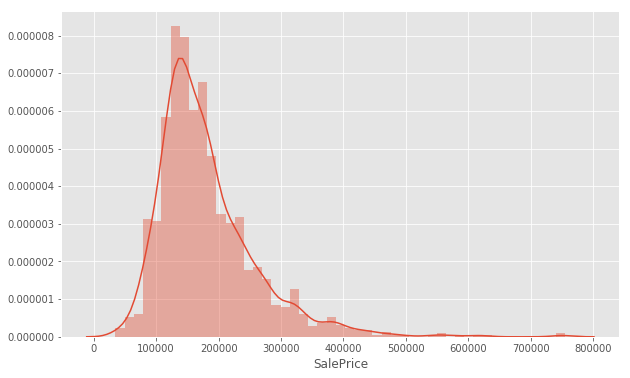

In [10]:
# Let's start with our dependent variable, SalePrice
plt.figure(figsize=(10,6))
sns.distplot(TrainSet.SalePrice)
plt.show()

In [0]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = TrainSet.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = TrainSet.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

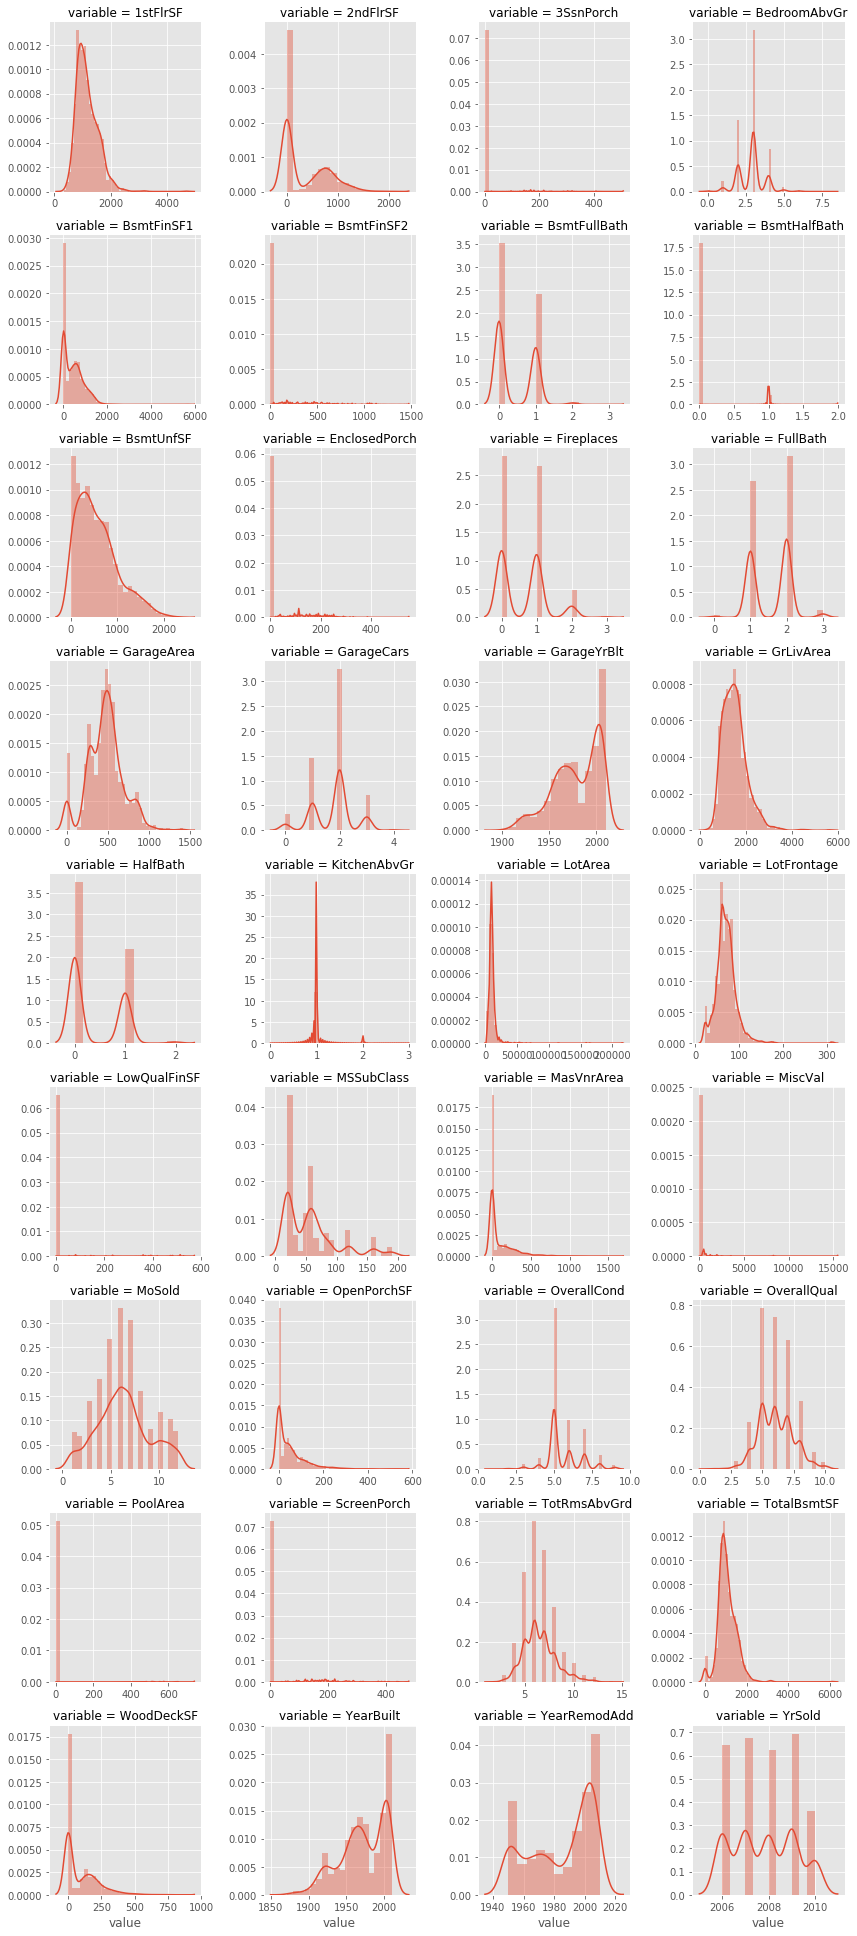

In [12]:
#This is skewed left - let's see what we can do with the rest of the variables

# Grid of distribution plots of all numerical features
f = pd.melt(TrainSet, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Alright, let's use some features to see if we can predict the home value using linear regression. 

#Let's start with Squarefeet and prepping the data by isolating two variables

SquareFeetData = TrainSet.filter(['GrLivArea','SalePrice', 'Id'], axis=1)

len(SquareFeetData)



1460

In [114]:
#Now let's drop the n/a's


#Filter out n/a
SquareFeetData.dropna()
len(SquareFeetData)

1429

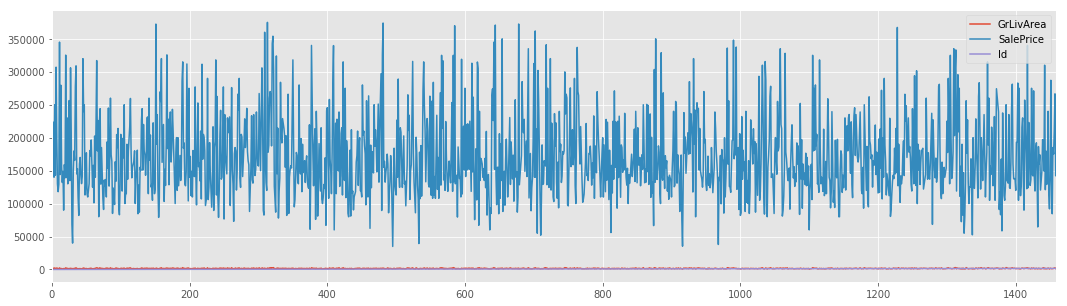

In [115]:
#This drops the stanard deviations above 3
std_dev = 3
SquareFeetData = SquareFeetData[(np.abs(stats.zscore(SquareFeetData)) < float(std_dev)).all(axis=1)]
SquareFeetData.plot(figsize=(18,5))

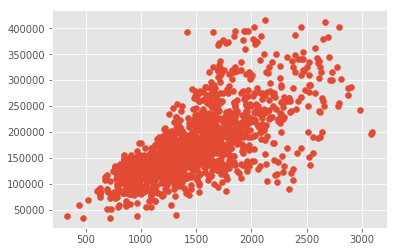

In [17]:
plt.scatter(SquareFeetData['GrLivArea'], SquareFeetData['SalePrice'])

In [18]:
X = pd.DataFrame(SquareFeetData['GrLivArea'])
y = pd.DataFrame(SquareFeetData['SalePrice'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)


[0.48743696256721913, 0.4369370648990918, 0.5178326457880088]


In [19]:
#Let's determine some outputs based on linear regression

SquareFeetMean = SquareFeetData.GrLivArea.mean()
SquareFeetMedian = SquareFeetData.GrLivArea.median()

#Defines variables

X_new = np.array([[334], [3086]])
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
#(array([1500]), array([[5000]]))
y_predict = lin_reg.predict(X_new)

y_predict



array([[ 59431.07507643],
       [337156.85896463]])

In [20]:
SquareFeetData.describe()

,GrLivArea,SalePrice,Id
count,1429.000000,1429.000000,1429.000000
mean,1480.874738,175171.149755,731.092372
std,459.859746,66800.159567,422.136776
min,334.000000,34900.000000,1.000000
25%,1125.000000,129500.000000,365.000000
50%,1452.000000,160200.000000,733.000000
75%,1746.000000,209500.000000,1095.000000
max,3086.000000,415298.000000,1460.000000


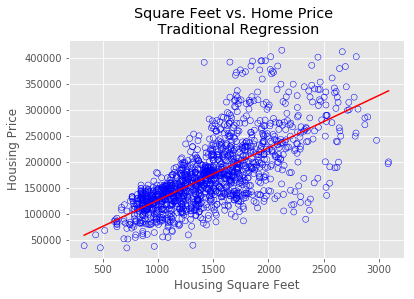

In [21]:
#How does this compare
fig, axis = plt.subplots()
axis.set_xlabel('Housing Square Feet')
axis.set_ylabel('Housing Price')
plt.title('Square Feet vs. Home Price \n Traditional Regression')
scatter_plot = axis.scatter(SquareFeetData['GrLivArea'], 
    SquareFeetData['SalePrice'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  
plt.plot(X_new, y_predict, "r-")

#Looks pretty good at a high level

In [22]:
#At a high level - this looks good - let's check it another way.
X_new1 = np.array([[SquareFeetMedian]])
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
#(array([1500]), array([[5000]]))
MedianPredict = lin_reg.predict(X_new1)

MedianValueRaw=  SquareFeetData[SquareFeetData['GrLivArea']==SquareFeetMedian]

print("The Median Predicted value is as follows", MedianPredict)
MedianValue = round(MedianValueRaw.SalePrice.mean(),-1)

print("The actual predicted value was", MedianValue)

print("This is off by", ((MedianPredict-MedianValue)/MedianValue), "%")



The Median Predicted value is as follows [[172257.17478101]]
The actual predicted value was 148450.0
This is off by [[0.16037167]] %


In [0]:
MedianValueArrayActual = ([34900], [415298])
MedianValueArrayPredict = (59431.07507643,337156.85896463)

In [92]:

import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
#Let's see if we can do a bit better by adding additional variables
from sklearn import metrics

#The goal of this is to calculate the RMS score for the initial Linear Regression model
rms = sqrt(mean_squared_error(MedianValueArrayActual, MedianValueArrayPredict))
print("The RMS score is", rms)

The RMS score is 57912.91551422287


In [0]:
#Conclusion - the model above needs work :-X

In [94]:
SquareFeetData.head()

,GrLivArea,SalePrice,Id
0,1710,208500,1
1,1262,181500,2
2,1786,223500,3
3,1717,140000,4
4,2198,250000,5


In [0]:
#Now let's try ridge regression - first let's scale the data.

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(SquareFeetData)

scaled_df = pd.DataFrame(scaled_df, columns=['GrLivArea', 'SalePrice', 'Id'])
Xr = pd.DataFrame(scaled_df['GrLivArea'])
yr = pd.DataFrame(scaled_df['SalePrice'])

In [96]:
#Now the data is scaled - let's run some tests before it's scaled
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[334], [3086]])

array([[ 54350.56606524],
       [349173.31320739]])

In [97]:
#Now that we've scaled it - what will it look like
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(Xr, yr)
ridge_reg.predict([[334], [3086]])

array([[ 231.87734842],
       [2142.43562048]])

In [98]:
#And using Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(Xr, yr)
RidgePrediction = ridge_reg.predict([[334], [3086]])
RidgePrediction

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 231.87734842],
       [2142.43562048]])

In [101]:
#Now let's scale the actual data down

scaled_Actual = scaler.fit_transform(MedianValueArrayActual)

#The goal of this is to calculate the RMS score for the Ridge Linear Regression model
rmsridge = sqrt(mean_squared_error(scaled_Actual, RidgePrediction))
print("The RMS score is", rmsridge)


The RMS score is 1523.1510719652472


In [105]:
#Wow - that's our best score yet!
#Now that we've scaled it - what will it look like
from sklearn.linear_model import Ridge
SqFeetActual = ([334],[1125], [1452], [1746], [3086])
scaled_SqFeetActual = scaler.fit_transform(SqFeetActual)

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(Xr, yr)
RidgePredictionMoreData = ridge_reg.predict(scaled_SqFeetActual)
RidgePredictionMoreData

array([[-0.9350075 ],
       [-0.32609022],
       [-0.07436335],
       [ 0.15195989],
       [ 1.18350117]])

In [108]:
#Now let's see what the RMS score is
RidgeActualValues = ([34900], [129500], [160200], [209500], [415298])
scaled_RidgeActualValues = scaler.fit_transform(RidgeActualValues)

#The goal of this is to calculate the RMS score for the Ridge Linear Regression model
rmsridgemore = sqrt(mean_squared_error(scaled_RidgeActualValues, RidgePredictionMoreData))
print("The RMS score is", rmsridgemore)

The RMS score is 0.31497362923502603


In [42]:
#BestScoreEVER

1460

In [109]:
#Adding data appears to help! - Let's try using a different variable (starting with year built)


X = pd.DataFrame(TrainSet['GrLivArea'])
X2 = pd.DataFrame(TrainSet['YearBuilt'])
X3 = pd.DataFrame(TrainSet['OverallCond'])
y = pd.DataFrame(TrainSet['SalePrice'])

lin_reg = LinearRegression()
lin_reg.fit(X2, y)
lin_reg.intercept_, lin_reg.coef_


(array([-2530308.24573236]), array([[1375.37346794]]))

In [53]:
MoreDataRegression = TrainSet.filter(['GrLivArea', 'YearBuilt', 'OverallCond','SalePrice', 'Id'], axis=1)
MoreDataRegression.describe()

,GrLivArea,YearBuilt,OverallCond,SalePrice,Id
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,5.575342,180921.195890,730.500000
std,525.480383,30.202904,1.112799,79442.502883,421.610009
min,334.000000,1872.000000,1.000000,34900.000000,1.000000
25%,1129.500000,1954.000000,5.000000,129975.000000,365.750000
50%,1464.000000,1973.000000,5.000000,163000.000000,730.500000
75%,1776.750000,2000.000000,6.000000,214000.000000,1095.250000
max,5642.000000,2010.000000,9.000000,755000.000000,1460.000000


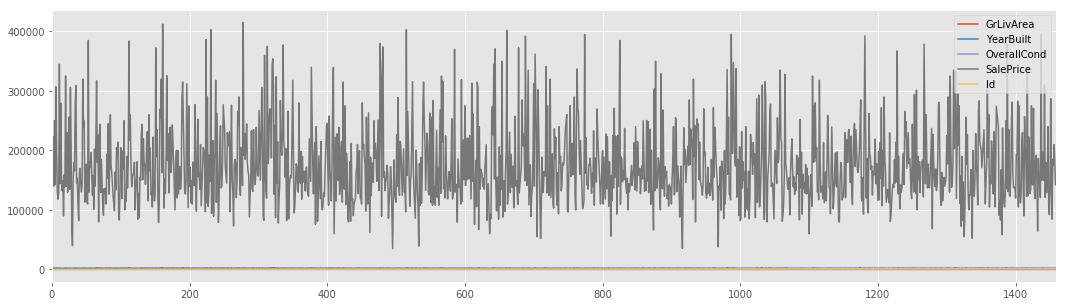

In [116]:
#This drops the stanard deviations above 3
std_dev = 3
MoreDataRegression = MoreDataRegression[(np.abs(stats.zscore(MoreDataRegression)) < float(std_dev)).all(axis=1)]
MoreDataRegression.plot(figsize=(18,5))

In [119]:
len(MoreDataRegression)

MoreDataRegression.describe()

,GrLivArea,YearBuilt,OverallCond,SalePrice,Id
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,1478.288063,1971.837026,5.545390,175285.248034,730.249464
std,456.543287,29.157591,1.014511,66404.014964,422.285504
min,334.000000,1885.000000,3.000000,34900.000000,1.000000
25%,1125.000000,1954.000000,5.000000,129700.000000,362.500000
50%,1445.000000,1973.000000,5.000000,161500.000000,734.000000
75%,1739.500000,2000.000000,6.000000,209200.000000,1092.500000
max,3086.000000,2009.000000,8.000000,415298.000000,1460.000000


In [120]:
#Let's see how the predictions work out for the percentiles listed above

YearBuiltActual = ([1885], [1954], [1973], [2000], [2009])
NewVariablesPredict = lin_reg.predict(YearBuiltActual)
NewVariablesPredict

array([[ 62270.74132869],
       [157171.51061633],
       [183303.60650713],
       [220438.69014143],
       [232817.05135286]])

In [121]:
rmsyearbuilt = sqrt(mean_squared_error(YearBuiltActual, NewVariablesPredict))
print("The RMS score is", rmsyearbuilt)

The RMS score is 179781.82340492407


In [122]:
#This is worse - this means square foot is a better indicator - for fun let's try ridge

#Standardize Data
scalerYearBuilt = preprocessing.StandardScaler()
scaled_dfYearBuilt = scaler.fit_transform(MoreDataRegression)

scaled_RidgeActualValuesYear = scaler.fit_transform(YearBuiltActual)


RidgePredictionYearBuilt= ridge_reg.predict(scaled_RidgeActualValuesYear)
rmslassoyearbuilt = sqrt(mean_squared_error(YearBuiltActual, RidgePredictionYearBuilt))
print("The RMS score is", rmslassoyearbuilt)


The RMS score is 1964.6804805582008


In [0]:
#This is better - but not as good as square feet